# Part II - (Prosper Loans Analysis)
## by (Philip Kwazu)

>**Before you start**: You must have the README.md file ready that include a summary of main findings that reflects on the steps taken during the data exploration (Part I notebook). The README.md file should also describes the key insights that will be conveyed by the explanatory slide deck (Part II  outcome)



## Investigation Overview

###### The goal of the presentation is to show the relationship between different key loan borrowering indications and how that affects the number of loans defaulted on and charged off .

> **Rubric Tip**: The key insights in the slideshow must match those documented in the README.md summary. 


## Dataset Overview
#####  The dataset contains 113937 and 80 features rangin from listingkey to investors. Most variables are numeric in nature, but variables Listingkey, loanstatus, CreditGrade, Employment Status, Borrower APR & Rate, Lenderyields and Ratings.


In [12]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [13]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

In [19]:
# Tidy the listedCreationDate Column
loans['ListingCreationDate'] = pd.to_datetime(loans.ListingCreationDate)
loans['date'] = loans['ListingCreationDate'].dt.date
loans['time'] = loans['ListingCreationDate'].dt.time
loans = loans.drop(['ListingCreationDate'], axis=1)

In [20]:
# Lets explore the highest earners among the borrowers.
high_earner = loans[loans.IncomeRange > '$100,000+']
medium_earners = loans[loans.IncomeRange <= '$75,000-99,999']
Average_earners = loans[loans.IncomeRange <= '$50,000-74,999']
lower_earners = loans[loans.IncomeRange <= '$25,000-49,999']

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

## Distribution Of Borrowers (Income Range)

### Borrower Income ranges from 1 to over 100,000 dollars . 

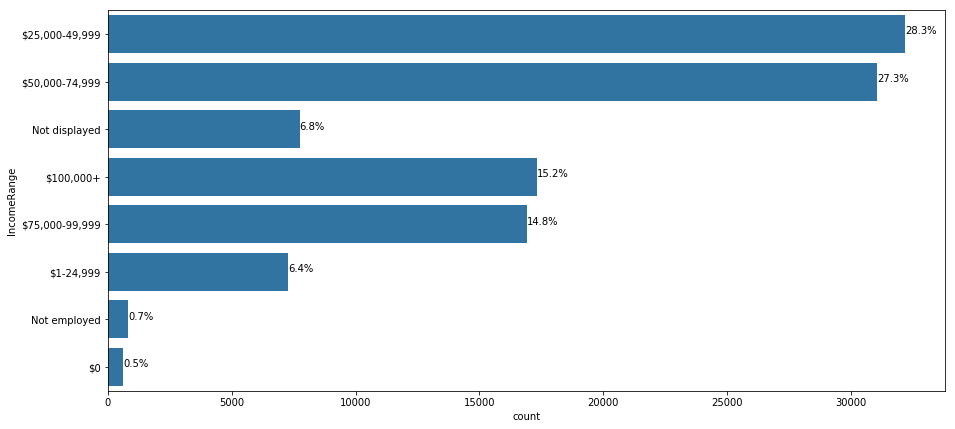

In [16]:
# lets see the income of the borrowers. 
plt.figure(figsize = [15, 7])
default_color = sb.color_palette()[0]
sb.countplot(data = loans, y = 'IncomeRange', color = default_color)

loan_count=loans['IncomeRange'].value_counts()
locs,labels=plt.yticks()
for loc,label in zip(locs,labels):
    count=loan_count[label.get_text()]
    pct_string= "{:0.1f}%".format(100*count/loans.shape[0])
    plt.text(y=loc, x=count, s=pct_string,ha="left",fontsize='medium')

## (Visualization 2)

## Distribution Of Borrowers (Loan Status)

#### Borrower loans status ranges from Completed, Charged off, current, Defaulted to name a few.





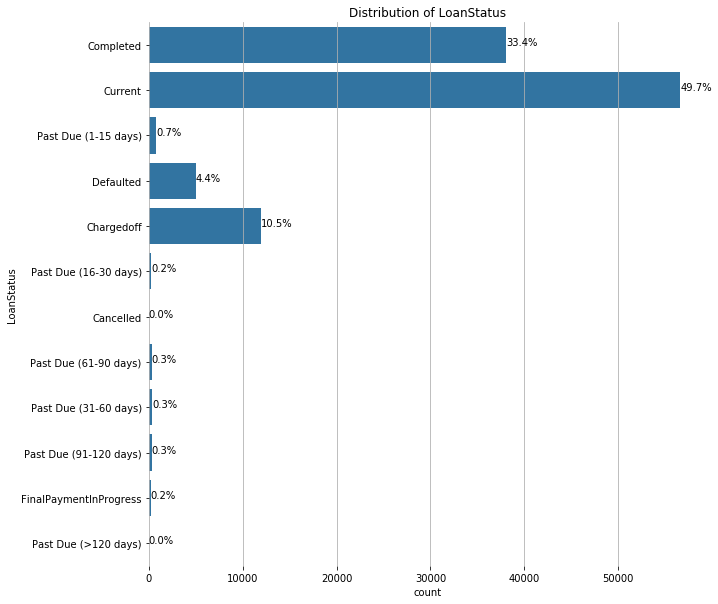

In [17]:
plt.figure(figsize = [10, 10])
default_color = sb.color_palette()[0]
sb.countplot(data = loans, y = 'LoanStatus', color = default_color)
sb.despine(bottom=True, left=True)
plt.grid(axis='x')
plt.title('Distribution of LoanStatus');
# plt.xticks(rotation=90)
# plt.show()

loan_count=loans['LoanStatus'].value_counts()
locs,labels=plt.yticks()
for loc,label in zip(locs,labels):
    count=loan_count[label.get_text()]
    pct_string= "{:0.1f}%".format(100*count/loans.shape[0])
    plt.text(y=loc, x=count, s=pct_string,ha="left",fontsize='medium')


## (Visualization 3)

## Distribution Of Borrowers (Occupations)


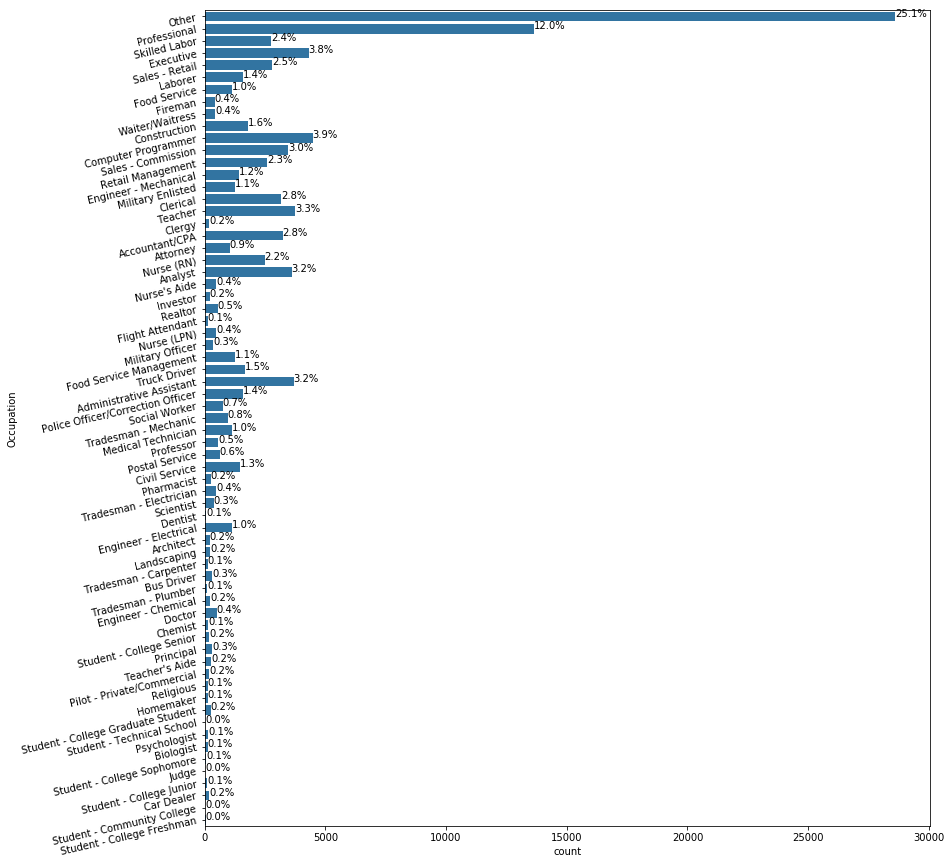

In [18]:
plt.figure(figsize = [13, 15])
default_color = sb.color_palette()[0]
sb.countplot(data = loans, y = 'Occupation', color = default_color)
plt.yticks(rotation=13)

loan_count=loans['Occupation'].value_counts()
locs,labels=plt.yticks()
for loc,label in zip(locs,labels):
    count=loan_count[label.get_text()]
    pct_string= "{:0.1f}%".format(100*count/loans.shape[0])
    plt.text(y=loc, x=count, s=pct_string,ha="left",fontsize='medium')

## (Visualization 4)

## Distribution Of Borrowers ( Credit Grade V Income Range)


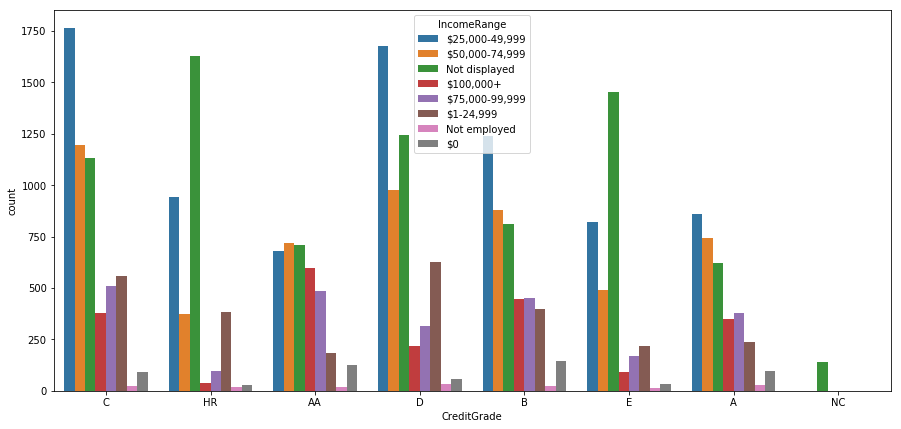

In [7]:
plt.figure(figsize = [15, 7])
sb.countplot(data = loans, x = 'CreditGrade', hue = 'IncomeRange') 

## (Visualization 5)

## Distribution Of Borrowers (High Earners Lender Yields V  APR )


Text(0,0.5,'BorrowerAPR')

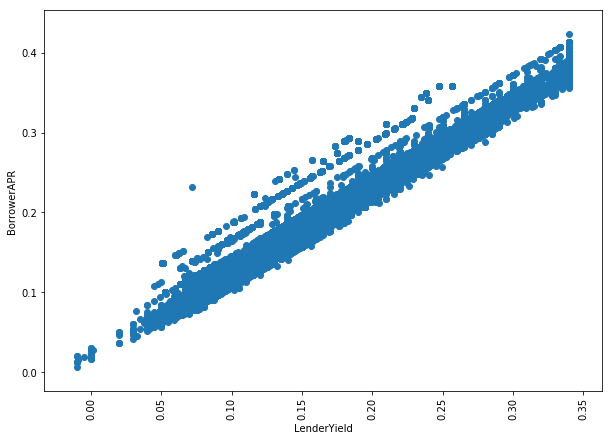

In [21]:
# In following up from the looking at the lender yield to the APR  of those earning  $99,000.
plt.figure(figsize = [10, 7])
plt.scatter(data = medium_earners, x = 'LenderYield', y = 'BorrowerAPR');
plt.xticks(rotation=90)
plt.xlabel('LenderYield')
plt.ylabel('BorrowerAPR')

## (Visualization 6)

## Distribution Of Borrowers (Low Earner Lender Yields , APR Viz a Viz Loan status )


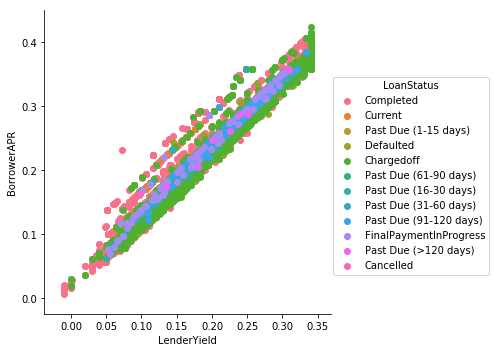

In [22]:
#  There are most bowwers listed as full time employed than employed and show more have lower yields and APRs. Although the lenderyield are higher many bowwers have still beenmany loans to highet earners being cahrged off and  the lender or creditor has written the account off as a loss, and the account is closed to future charges.
g = sb.FacetGrid(data = lower_earners, hue = 'LoanStatus', size = 5)
g.map(plt.scatter, 'LenderYield', 'BorrowerAPR')
g.add_legend()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 655267 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
